In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
from scipy.misc import imread
import matplotlib.pyplot as plt
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title

identities = ["afflec","bieber","clooney","daimon","deniro","duchovny","hanks","kutcher","seinfeld","zukerberg"]
versions ={
    'ver1':['original','lips','hair','eye_color','eye_shape','brows_shape'],
    'ver2': ['original','brows_shape','eye_shape','eye_color','hair','lips'],
    'ver3': ['original','hair','lips','eye_color','eye_shape','brows_shape'],
    'ver4': ['original','lips','eye_color','eye_shape','brows_shape','hair']
}

lowps = ['original','mouth','eyes','face','skin','nose']

def get_df_highps(repr_dict):
    differences = np.zeros((len(identities),5))

    # Calculate differences
    for j,identity in enumerate(identities):
        for version in range(1,4):
            # The representation is saved in a numpy file
            # There is a numpy file for each directory
            ver = "ver"+str(version)
            for change in range(1,6):
                prev_repr = repr_dict[identity+"_high-ps_"+ver+"_"+versions[ver][change-1]]
                reprs = repr_dict[identity+"_high-ps_"+ver+"_"+versions[ver][change]]
                d = reprs - prev_repr

                # Go by version 1
                k = versions['ver1'].index(versions[ver][change])-1
                differences[j][k] += np.dot(d, d)

    df = pd.DataFrame(differences/4)
    df.columns = ['lips','hair','eye_color','eye_shape','brows_shape']
    return df

def get_df_lowps(repr_dict):
    differences = np.zeros((len(identities),5))
    # Calculate differences
    for j,identity in enumerate(identities):
        for change in range(1,6):
            prev_repr = repr_dict[identity+"_low-ps_"+lowps[change-1]]
            reprs = repr_dict[identity+"_low-ps_"+lowps[change]]
            d = reprs - prev_repr

            # Go by version 1
            differences[j][change-1] = np.dot(d, d)

    df = pd.DataFrame(differences)
    df.columns = ['mouth','eye_dist','face','skin','nose']
    df["identities"]=identities
    df = df.set_index("identities")
    #df = df[df['nose'] < 1.5] # The change is not only in the nose for deniro
    return df

def get_rep(train_type):

    file = "transformations_trained_on_{}.npy".format(train_type.lower())
    repr_dict = np.load(file, encoding='latin1').item()
    return repr_dict

# High-PS Feature Importance

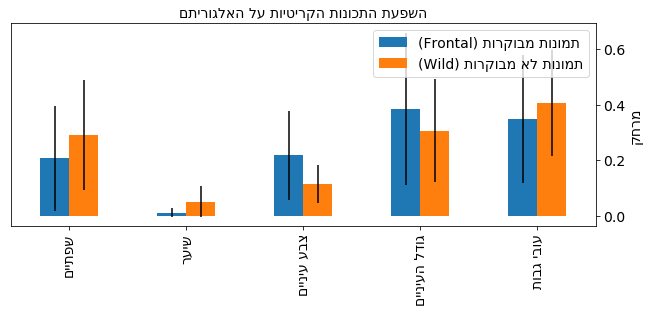

In [2]:
df_frontal = get_df_highps(get_rep("frontal"))
df_wild = get_df_highps(get_rep("wild"))
train_method_df = pd.DataFrame({"(Frontal) תורקובמ תונומת":df_frontal.mean(),"(Wild) תורקובמ אל תונומת":df_wild.mean()})
train_method_df.index = ["תובג יבוע","םייניעה לדוג","םייניע עבצ","רעיש","םייתפש"][::-1]
errs = pd.DataFrame({"(Frontal) תורקובמ תונומת":df_frontal.std(),"(Wild) תורקובמ אל תונומת":df_wild.std()})
errs.index = ["תובג יבוע","םייניעה לדוג","םייניע עבצ","רעיש","םייתפש"][::-1]

ax = train_method_df.plot.bar(title="םתירוגלאה לע תויטירקה תונוכתה תעפשה",bottom=0,yerr=errs)
ax.yaxis.set_label_position("right")
ax.set(ylabel="קחרמ")
ax.yaxis.tick_right()
plt.tight_layout()
plt.plot()
f = ax.get_figure()
f.set_size_inches(10, 5)
#ax.get_figure().savefig('Feature_Importance_HighPS.png')

In [15]:
np.sqrt(np.sum(np.power(df_wild - df_wild.mean(),2))/(len(df_wild)-1))

lips           0.197800
hair           0.055136
eye_color      0.068874
eye_shape      0.185447
brows_shape    0.192339
dtype: float64

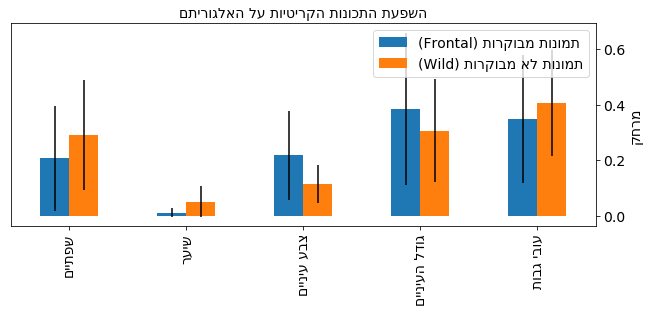

In [16]:
df_frontal = get_df_highps(get_rep("frontal"))
df_wild = get_df_highps(get_rep("wild"))
train_method_df = pd.DataFrame({"(Frontal) תורקובמ תונומת":df_frontal.mean(),"(Wild) תורקובמ אל תונומת":df_wild.mean()})
train_method_df.index = ["תובג יבוע","םייניעה לדוג","םייניע עבצ","רעיש","םייתפש"][::-1]
errs = pd.DataFrame({"(Frontal) תורקובמ תונומת":df_frontal.std(),"(Wild) תורקובמ אל תונומת":df_wild.std()})
errs.index = ["תובג יבוע","םייניעה לדוג","םייניע עבצ","רעיש","םייתפש"][::-1]

ax = train_method_df.plot.bar(title="םתירוגלאה לע תויטירקה תונוכתה תעפשה",bottom=0,yerr=errs)
ax.yaxis.set_label_position("right")
ax.set(ylabel="קחרמ")
ax.yaxis.tick_right()
plt.tight_layout()
plt.plot()
f = ax.get_figure()
f.set_size_inches(10, 5)
#ax.get_figure().savefig('Feature_Importance_HighPS.png')

# Low-PS - Feature Importance

In [17]:
df_frontal = get_df_lowps(get_rep("frontal"))
df_wild = get_df_lowps(get_rep("wild"))
train_method_df = pd.DataFrame({"(Frontal) תורקובמ תונומת":df_frontal.mean(),"(Wild) תורקובמ אל תונומת":df_wild.mean()})
train_method_df.index = ["ףאה לדוג","ףוג עבצ","םינפ בחור","םייניעה ןיב קחרמ","הפ"][::-1]

errs = pd.DataFrame({"(Frontal) תורקובמ תונומת":df_frontal.std(),"(Wild) תורקובמ אל תונומת":df_wild.std()})
errs.index = ["ףאה לדוג","ףוג עבצ","םינפ בחור","םייניעה ןיב קחרמ","הפ"][::-1]

ax = train_method_df.plot.bar(title="םתירוגלאה לע תויטירקה אלה תונוכתה תעפשה",bottom=0,yerr=errs)
ax.yaxis.set_label_position("right")
ax.set(ylabel="קחרמ")
ax.yaxis.tick_right()
plt.tight_layout()
plt.plot()
f = ax.get_figure()

f.set_size_inches(10, 5)
#f.savefig('Feature_Importnce_LowPS.png')

# Calculate T-Test between wild and frontal on High-PS

In [18]:
from scipy.stats import ttest_ind,ttest_rel
print("High-PS")
for column in ['lips','eye_color','eye_shape','brows_shape']:

    frontal_values = get_df_highps(get_rep("frontal"))[column]
    wild_values = get_df_highps(get_rep("wild"))[column]
    res = ttest_ind(frontal_values, wild_values)
    print("Feature: {}, statistic: {}, pvalue: {}".format(column,round(res.statistic,3),round(res.pvalue,3)))

High-PS
Feature: lips, statistic: -0.964, pvalue: 0.348
Feature: eye_color, statistic: 1.849, pvalue: 0.081
Feature: eye_shape, statistic: 0.762, pvalue: 0.456
Feature: brows_shape, statistic: -0.604, pvalue: 0.554


# Calculate T-Test between wild and frontal on Low-PS

In [19]:

print("Low-PS")

for column in ['mouth','eye_dist','face','skin','nose']:

    frontal_values = get_df_lowps(get_rep("frontal"))[column]
    wild_values = get_df_lowps(get_rep("wild"))[column]
    res = ttest_ind(frontal_values, wild_values)
    print("Feature: {}, statistic: {}, pvalue: {}".format(column,round(res.statistic,3),round(res.pvalue,4)))

Low-PS
Feature: mouth, statistic: -1.508, pvalue: 0.1489
Feature: eye_dist, statistic: -1.393, pvalue: 0.1805
Feature: face, statistic: -2.696, pvalue: 0.0148
Feature: skin, statistic: 4.481, pvalue: 0.0003
Feature: nose, statistic: -0.769, pvalue: 0.452


In [20]:

def get_df_highps_dist(repr_dict):
    differences = np.zeros((len(identities),5))

    # Calculate differences
    for j,identity in enumerate(identities):
        for version in range(1,5):
            # The representation is saved in a numpy file
            # There is a numpy file for each directory
            ver = "ver"+str(version)
            prev_repr = repr_dict[identity+"_high-ps_"+ver+"_"+versions[ver][0]]
            for change in range(1,6):
                reprs = repr_dict[identity+"_high-ps_"+ver+"_"+versions[ver][change]]
                d = reprs - prev_repr

                differences[j][change-1] += np.dot(d, d)
            
    df = pd.DataFrame(differences/4)
    df.columns = [1,2,3,4,5]
    return df

def get_df_lowps_dist(repr_dict):
    differences = np.zeros((len(identities),5))
    # Calculate differences
    for j,identity in enumerate(identities):
        prev_repr = repr_dict[identity+"_low-ps_"+lowps[0]]

        for change in range(1,6):
            reprs = repr_dict[identity+"_low-ps_"+lowps[change]]
            d = reprs - prev_repr

            # Go by version 1
            differences[j][change-1] = np.dot(d, d)
        
            

    df = pd.DataFrame(differences)
    df.columns = [1,2,3,4,5]
    df["identities"]=identities
    df = df.set_index("identities")
    #df = df[df['nose'] < 1.5] # The change is not only in the nose for deniro
    return df


# Number of features changed - High-PS vs Low-PS on Frontal

[]

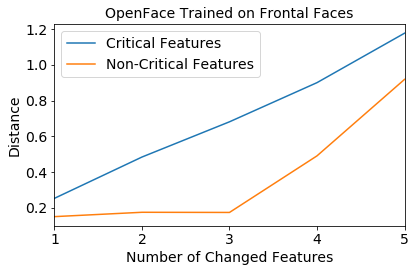

In [21]:
df_frontal_highps = get_df_highps_dist(get_rep("frontal"))
df_frontal_lowps = get_df_lowps_dist(get_rep("frontal"))


train_method_df = pd.DataFrame({"Critical Features":df_frontal_highps.mean(),"Non-Critical Features":df_frontal_lowps.mean()})
ax = train_method_df.plot(title="OpenFace Trained on Frontal Faces")
plt.xticks([1,2,3,4,5])
ax.set(ylabel="Distance",xlabel="Number of Changed Features")
plt.tight_layout()
plt.plot()

# Number of features changed - High-PS vs Low-PS on Wild

[]

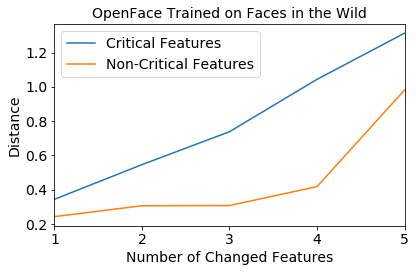

In [22]:
df_wild_highps = get_df_highps_dist(get_rep("wild"))
df_wild_lowps = get_df_lowps_dist(get_rep("wild"))

train_method_df = pd.DataFrame({"Critical Features":df_wild_highps.mean(),"Non-Critical Features":df_wild_lowps.mean()})
ax = train_method_df.plot(title="OpenFace Trained on Faces in the Wild")
plt.xticks([1,2,3,4,5])
ax.set(ylabel="Distance",xlabel="Number of Changed Features")
plt.tight_layout()
plt.plot()

# Compare Frontal with Wild

In [23]:
frontal_results = pd.read_csv("frontal_results.csv")
del frontal_results["Unnamed: 0"]
wild_results = pd.read_csv("wild_results.csv")
del wild_results["Unnamed: 0"]

In [24]:
means = {"(Frontal) תורקובמ תונומת":frontal_results.mean(),"(Wild) תורקובמ אל תונומת":wild_results.mean()}

errors = {"(Frontal) תורקובמ תונומת":frontal_results.std(),"(Wild) תורקובמ אל תונומת":wild_results.std()}
df = pd.DataFrame(means)

In [25]:
ax = df.plot(kind='bar',yerr=errors)
df.index = ["הנוש","תויטירק תונוכת","תויטירק אל תונוכת","ההז"][::-1]
ax.yaxis.set_label_position("right")
ax.set(ylabel="קחרמ")
ax.set_title("ןומיאה גוסל תונוכתה גוס תאוושה")
ax.yaxis.tick_right()
plt.tight_layout()
f = ax.get_figure()

f.set_size_inches(10, 10)